![banner](https://learn.responsibly.ai/assets/img/banner.jpg)

# Class 4 - Discrimination & Fairness: Pre-Class Task


In the fourth class, we will continue our journy into the challenge of fairness in machine learning.

The goal of this pre-class task is to get familiar with an healthcare dataset we will work on in the third class. It is an Electronic Health Record (EHR) dataset which contains an electronic version of patients' medical history. The dataset based on data from a US health insurance firm, so it contains also cost information. From privacy grounds, the data went through an "anonomization" process, but we'll get into that in the fifth classes.

The following six task will help you to get familiar with this dataset, understand its various columns and they are releated to each other. 

As usual, if you have any questions, please post them in the #class-4 channel in Discord or join the office hours.

Let's start!

## How to write your answers?


For each task, you should write a code and `print()` the answers to the questions. You should print them in the following format (see Task 1 example): 

```python
print(f'T{task_number}-Q{question_number}: {answer}')
```

In some questions, you will need to display a data frame. The format of answering these type of question is:

```python
print(f'T{task_number}-Q{question_number}:')
display(answer_df)
```

## Setup

In [ ]:
!wget http://stash.responsibly.ai/4-fairness/activity/patients_data.csv -O patients_data.csv -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set()

## Dataset

### Meaning of column suffixes (endings)
* _t: indicates this is a time dependent variable from year t (e.g. t = 2020)
* _tm1: indicates this is a time dependent variable from year t minus 1 (t-1) (e.g. if t = 2021 then t - 1 = 2020).

### Variables categories

Can be used as target variables (because they are "at time t" ):

* Outcomes at time t: "outcomes" for a given calendar year (t): cost, health, program enrollment, and the commercial risk score. 

Can be used as "predictors" (features): 

* Demographic: e.g `gender`, `race`, `age`.
* Comorbidity variables at time t-1: indicators for specific chronic comorbidities (illnesses) that were active in the previous year. <br> E.g `liver_elixhauser_tm1` which is an indicator for liver disease.
* Cost variables at time t-1: Costs claimed from the patients' insurance payer over the previous year. <br> E.g `cost_laboratory_tm1` which is the total cost for laboratory tests.
* Biomarker/medication variables at time t-1: indicators capturing normal or abnormal values (or missingness) of biomarkers or relevant medications, over the previous year. <br> E.g `ghba1c_min-low_tm1` which is an indicator for low (< 4) minimum GHbA1c test result.

An indicator is a binary variable: 1 stands for 'True' or 'Has the condition', 0 stands for 'False' or 'Doesn't Have'.

For a detailed description of the dataset and the columns see [this document](https://docs.google.com/document/d/1EGm_eqz7Kdv9mYiJr57zWirHsUOmaMO35HMe5AYq2BI/edit?usp=sharing), BUT YOU DON'T NEED IT, really.

The EHR dataset contains 48,784 rows (patients) and 160 columns/variables. 

### Loading the data

In [ ]:
data = pd.read_csv('patients_data.csv')
data.head(5)

,illnesses_sum_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,gender,race,...,sodium_max-normal_tm1,trig_min-low_tm1,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1
0,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,Male,white,...,0,0,0,0,0,0,0,0,0,0
1,3,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,Female,white,...,1,0,0,1,0,0,1,0,0,1
2,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,Female,white,...,0,0,0,0,0,0,0,0,0,0
3,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,Female,white,...,0,0,0,0,0,0,0,0,0,0
4,1,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,Female,white,...,1,0,0,0,0,0,0,0,0,0


### Columns declaration

It is very difficult to work with all the 160 features all together. Therefore, we grouped them into high-level categoires.

In [ ]:
# Outcome variables at time T (see above)
outcomes_t = ['illnesses_sum_t', 'cost_t', 'cost_avoidable_t', 'bps_mean_t', 'ghba1c_mean_t', 'hct_mean_t', 'cre_mean_t', 'ldl_mean_t']

# Demographic variables at time T-1
demographic_tm1 = ['gender', 'race', 'age']

# Chronic illness condition variables at time T-1
comorbidities_tm1 = ['illnesses_sum_tm1', 'alcohol_elixhauser_tm1', 'anemia_elixhauser_tm1', 'arrhythmia_elixhauser_tm1', 'arthritis_elixhauser_tm1', 'bloodlossanemia_elixhauser_tm1', 'coagulopathy_elixhauser_tm1', 'compdiabetes_elixhauser_tm1', 'depression_elixhauser_tm1', 'drugabuse_elixhauser_tm1', 'electrolytes_elixhauser_tm1', 'hypertension_elixhauser_tm1', 'hypothyroid_elixhauser_tm1', 'liver_elixhauser_tm1', 'neurodegen_elixhauser_tm1', 'obesity_elixhauser_tm1', 'paralysis_elixhauser_tm1', 'psychosis_elixhauser_tm1', 'pulmcirc_elixhauser_tm1', 'pvd_elixhauser_tm1', 'renal_elixhauser_tm1', 'uncompdiabetes_elixhauser_tm1', 'valvulardz_elixhauser_tm1', 'wtloss_elixhauser_tm1', 'cerebrovasculardz_romano_tm1', 'chf_romano_tm1', 'dementia_romano_tm1', 'hemiplegia_romano_tm1', 'hivaids_romano_tm1', 'metastatic_romano_tm1', 'myocardialinfarct_romano_tm1', 'pulmonarydz_romano_tm1', 'tumor_romano_tm1', 'ulcer_romano_tm1']

# Cost variables at time T-1
costs_tm1 = ['cost_dialysis_tm1', 'cost_emergency_tm1', 'cost_home_health_tm1', 'cost_ip_medical_tm1', 'cost_ip_surgical_tm1', 'cost_laboratory_tm1', 'cost_op_primary_care_tm1', 'cost_op_specialists_tm1', 'cost_op_surgery_tm1', 'cost_other_tm1', 'cost_pharmacy_tm1', 'cost_physical_therapy_tm1', 'cost_radiology_tm1']

# Biomarkers (e.g., blood test result) varbles at time T-1
biomarkers_tm1 = ['lasix_dose_count_tm1', 'lasix_min_daily_dose_tm1', 'lasix_mean_daily_dose_tm1', 'lasix_max_daily_dose_tm1', 'cre_tests_tm1', 'crp_tests_tm1', 'esr_tests_tm1', 'ghba1c_tests_tm1', 'hct_tests_tm1', 'ldl_tests_tm1', 'nt_bnp_tests_tm1', 'sodium_tests_tm1', 'trig_tests_tm1', 'cre_min-low_tm1', 'cre_min-high_tm1', 'cre_min-normal_tm1', 'cre_mean-low_tm1', 'cre_mean-high_tm1', 'cre_mean-normal_tm1', 'cre_max-low_tm1', 'cre_max-high_tm1', 'cre_max-normal_tm1', 'crp_min-low_tm1', 'crp_min-high_tm1', 'crp_min-normal_tm1', 'crp_mean-low_tm1', 'crp_mean-high_tm1', 'crp_mean-normal_tm1', 'crp_max-low_tm1', 'crp_max-high_tm1', 'crp_max-normal_tm1', 'esr_min-low_tm1', 'esr_min-high_tm1', 'esr_min-normal_tm1', 'esr_mean-low_tm1', 'esr_mean-high_tm1', 'esr_mean-normal_tm1', 'esr_max-low_tm1', 'esr_max-high_tm1', 'esr_max-normal_tm1', 'ghba1c_min-low_tm1', 'ghba1c_min-high_tm1', 'ghba1c_min-normal_tm1', 'ghba1c_mean-low_tm1', 'ghba1c_mean-high_tm1', 'ghba1c_mean-normal_tm1', 'ghba1c_max-low_tm1', 'ghba1c_max-high_tm1', 'ghba1c_max-normal_tm1', 'hct_min-low_tm1', 'hct_min-high_tm1', 'hct_min-normal_tm1', 'hct_mean-low_tm1', 'hct_mean-high_tm1', 'hct_mean-normal_tm1', 'hct_max-low_tm1', 'hct_max-high_tm1', 'hct_max-normal_tm1', 'ldl_min-low_tm1', 'ldl_min-high_tm1', 'ldl_min-normal_tm1', 'ldl-mean-low_tm1', 'ldl-mean-high_tm1', 'ldl-mean-normal_tm1', 'ldl_max-low_tm1', 'ldl_max-high_tm1', 'ldl_max-normal_tm1', 'nt_bnp_min-low_tm1', 'nt_bnp_min-high_tm1', 'nt_bnp_min-normal_tm1', 'nt_bnp_mean-low_tm1', 'nt_bnp_mean-high_tm1', 'nt_bnp_mean-normal_tm1', 'nt_bnp_max-low_tm1', 'nt_bnp_max-high_tm1', 'nt_bnp_max-normal_tm1', 'sodium_min-low_tm1', 'sodium_min-high_tm1', 'sodium_min-normal_tm1', 'sodium_mean-low_tm1', 'sodium_mean-high_tm1', 'sodium_mean-normal_tm1', 'sodium_max-low_tm1', 'sodium_max-high_tm1', 'sodium_max-normal_tm1', 'trig_min-low_tm1', 'trig_min-high_tm1', 'trig_min-normal_tm1', 'trig_mean-low_tm1', 'trig_mean-high_tm1', 'trig_mean-normal_tm1', 'trig_max-low_tm1', 'trig_max-high_tm1', 'trig_max-normal_tm1']

## Tasks

### Task 1 (example)

1. How many patients (each row is a patient) there are?
2. How many males?
3. How many females?
4. Display a data frame: for each gender, show the average total number of active chronic illnesses at time t (`illnesses_sum_t`) and the average of the total medical expenditures (`cost_t`).

In [ ]:
answer1 = data.shape[0]
answer2 = data[data['gender'] == 'Male'].shape[0]
answer3 = data[data['gender'] == 'Female'].shape[0]
answer4 = data.groupby('gender').agg({'illnesses_sum_t': 'mean', 'cost_t': 'mean'})

print(f"T1-Q1: {answer1}")
print(f"T1-Q2: {answer2}")
print(f"T1-Q3: {answer3}")
print(f"T1-Q4:")
display(answer4)

T1-Q1: 48784
T1-Q2: 18021
T1-Q3: 30763
T1-Q4:


,illnesses_sum_t,cost_t
gender,,
Female,1.299516,8004.219354
Male,1.448310,7071.627546


### Task 2

1. Create a new column named `cost_tm1` which sum up all medical expenditures at time tm1 (see `costs_tm1` variable declared above). Don't print anything.
2. Display a data frame: for each gender, show the average total number of active chronic illnesses at time tm1 (`illnesses_sum_tm1`) and the average of the total medical expenditures at tm1 (`cost_tm1`).
3. How many patients have higher medical expenditures at time t than tm1?

In [ ]:
# Your code here...
data['cost_tm1'] = data[costs_tm1].sum(axis=1)

answer5 = data.groupby('gender').agg({'illnesses_sum_t': 'mean', 'cost_tm1': 'mean'})
answer12 = data[data['cost_t'] > data['cost_tm1']].shape[0]

print(f"T2-Q2:")
display(answer5)
print()
print(f"T2-Q3: {answer12}")

T2-Q2:


,illnesses_sum_t,cost_tm1
gender,,
Female,1.299516,7255.489712
Male,1.448310,6904.070251



T2-Q3: 24517


### Task 3

1. Print all the age groups (unique values of `age` column)
2. Display a dataframe: for each age group show the average value of the following variables at time t (`vars_at_t` defined below): `['bps_mean_t', 'ghba1c_mean_t', 'hct_mean_t', 'cre_mean_t', 'ldl_mean_t']`.
Look at the Q2 data frame, and answer the following questions:
3. Which age group has the lowest systolic blood pressure (`bps_mean_t`)?
4. Which age group has the highest HbA1C (glycated hemoglobin, `ghba1c_mean_t`)?
5. Which age group has the highest hematocrit (`hct_mean_t`)?

In [ ]:
vars_at_t = ['bps_mean_t', 'ghba1c_mean_t', 'hct_mean_t', 'cre_mean_t', 'ldl_mean_t']

In [ ]:
# Your code here...
ages = sorted(data['age'].unique())
print(f"T3-Q1")
print(ages)
print()

answer6 = data.groupby('age')[vars_at_t].agg('mean')
print(f"T3-Q2")
display(answer6)
print()
print(f"T3-Q3: {answer6['bps_mean_t'].idxmin()}")
print(f"T3-Q4: {answer6['ghba1c_mean_t'].idxmax()}")
print(f"T3-Q5: {answer6['hct_mean_t'].idxmax()}")

T3-Q1
['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

T3-Q2


,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t
age,,,,,
18-24,122.591489,5.615850,40.644960,0.903642,110.294194
25-34,121.753497,5.705333,40.563871,0.891816,107.036165
35-44,123.385061,5.787236,40.754846,0.889140,108.703237
45-54,125.733081,5.880043,40.742235,0.946906,108.517106
55-64,129.458990,6.017977,40.622740,0.959958,103.267953
65-74,132.225551,6.140606,40.102159,1.001855,95.528356
75+,133.963438,6.228021,38.861202,1.082642,91.822658



T3-Q3: 25-34
T3-Q4: 75+
T3-Q5: 35-44


### Task 4

1. Create a race indicator column named `'black'`. If the patient is black, the value of the indicator should be 1, otherwise 0. Don't print anything.
2. How many black patients are there?
3. How many white patients are there?
4. Calculate the correlation between the race indicator and `cost_t`. 
5. Calculate the correlation between the race indicator and HbA1C (glycated hemoglobin, `ghba1c_mean_t`).

In [18]:
# Your code here...
data['black'] = np.where(data['race'] == 'black', 1, 0)

answer7 = data[data['black'] == 1].shape[0]
answer8 = data[data['black'] == 0].shape[0]

answer9 = data['black'].corr(data['cost_t'])
answer10 = data['black'].corr(data['ghba1c_mean_t'])

print(f"T4-Q2: {answer7}")
print(f"T4-Q3: {answer8}")
print(f"T4-Q4: {answer9}")
print(f"T4-Q5: {answer10}")

T4-Q2: 5582
T4-Q3: 43202
T4-Q4: 0.031538562703831395
T4-Q5: 0.20132916202687248


### Task 5

In the cell below, we define a visualization function that we will use in class. The following questions will help you understand the visualization better. First, read the function documentation (and code) and answer the questions:

1. Call the function with `x_columns = 'cost_tm1'`, `y_column = 'illnesses_sum_tm1'` (leave `group_column` with its default value). 

Look at the plot and answer the questions (free text questions)

2. What do the plotted X markers represent?
3. Is the medical costs variable a good indicator of the illness conditions? For its whole range or only for part of it?

In [ ]:
def plot_x_vs_y(df, x_column, y_column):
    """
    Creates a plot with the following charts:
    1. Line plot of the pairs:
        {(x_column i-th decile, y_column): i = 1, 2, ..., 10}
    2. scatter plot ('X' markers) of the pairs:
        {(x_column j-th percentile, y_column): j = 1, 2, ..., 100}
    """

    df = df.copy()
    df[f'{x_column} (deciles)'] = df[x_column].rank(pct=True).round(1)
    df[f'{x_column} (percentiles)'] = df[x_column].rank(pct=True).round(2)
    
    x_p_vs_y = (df
                .groupby(f'{x_column} (percentiles)')
                [y_column]
                .mean()
                .reset_index())
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.lineplot(data=df, x=f'{x_column} (deciles)', y=y_column,
                 ax=ax)
    sns.scatterplot(data=x_p_vs_y, x=f'{x_column} (percentiles)',
                    y=y_column,
                    marker='X', legend=False, ax=ax)
    if 'cost' in y_column.lower():
        plt.yscale('log')

    plt.show()


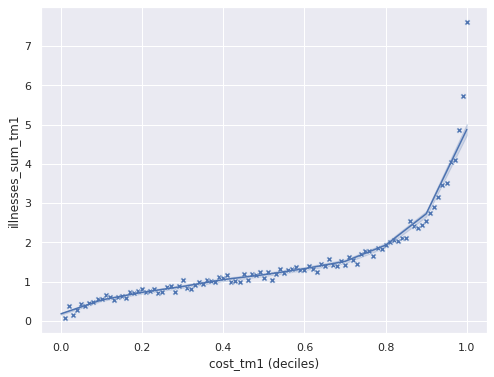

In [ ]:
# call the function (T5-Q1) here

plot_x_vs_y(data,
            x_column='cost_tm1',
            y_column='illnesses_sum_tm1')

In [ ]:
# Your code here...
print(f"T5-Q2: The number of illnesses that the top x% percentile of spenders has.")
print()
print(f"T5-Q3: Between the 80% and 100% percentile this mark is a good indicator, from there below the difference in the number of illnesses to each amount of costs isn't huge.")

T5-Q2: The number of illnesses that the top x% percentile of spenders has.

T5-Q3: Between the 80% and 100% percentile this mark is a good indicator, from there below the difference in the number of illnesses to each amount of costs isn't huge.


### Task 6

We define patients at risk at time t as patients being in the top decile in terms of medical costs at time tm1 (90th+ percentile of `cost_t`).

1. What is the 90th percentile of `cost_tm1`?

In [ ]:
# Your code here...
answer11 = data['cost_tm1'].quantile(0.9)
print(f"T6-Q1: {answer11}")

T6-Q1: 16387.000000000044


In the cell below, we define a visualization function that we will use in class. The following questions will help you understand the visualization better. First, read the function documentation (and code) and answer the questions:

2. Call the function with `score_column = 'cost_tm1'`, `percentile_threshold=90`, `y_column = 'illnesses_sum_t'` and `group_column = 'age'`. 

Look at the plot and answer the question (free text question)

3. Describe in words the relationship between age, number of chronic illnesses at year `t` and medical cost at year `tm1`.

In [ ]:
def at_risk_boxplot(df, score_column, percentile_threshold,
                    y_column, group_column=None):
    """
    Compares patients at risk against against not at risk.
    The risk is determined using the score_column (e.g. risk score)
    and a percentile_threshold (integer between 1 and 100). 
    Any patient with score_column >= percentile_threshold is considered at risk.
    The function plots boxplot of y_column for each risk group.
    Then it splits the plot into sub-plots according to the group_column.
    If group_column is not given (or None) it doesn't split.
    If y_column is a cost column (y_column contains 'cost'), it uses log scale.
    """

    columns = [score_column, y_column]
    if group_column is not None:
        columns.append(group_column)
        groups_order = sorted(df[group_column].unique().tolist())       
    else:
        groups_order = None
    df = df[columns].copy()
    df['risk_percentile'] = df[score_column].rank(pct=True).round(2) * 100
    df['at_risk'] = df['risk_percentile'] >= percentile_threshold
    sns.boxplot(data=df, x='at_risk', y=y_column, hue=group_column,
                hue_order=groups_order, showfliers=False)
    if 'cost' in y_column.lower():
        plt.yscale('log')
    plt.show()

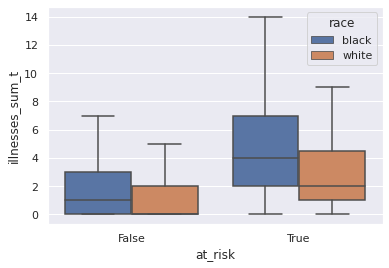

In [19]:
# call the function (T6-Q2) here
at_risk_boxplot(data, score_column='cost_t',
                percentile_threshold=90,
                y_column='illnesses_sum_t',
                group_column='race')

In [ ]:
# Your code here...
print(f"T6-Q3: Generally, the older and more you spend on medical costs, the higher the number of diseases.")

T6-Q3: Generally, the older and more you spend on medical costs, the higher the number of diseases.


## That's all!

1. If you found a mistake / problem in this notebook, or something was unclear, please post your question in the **`#class-4`** channel in our Discord server.

2. Make sure that you save this notebook (In Colab: File > Download > Download .ipynb)

3. Submit your the notebook via Gradescope: https://go.responsibly.ai/gradescope